In [18]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import re
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import sklearn

In [2]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

In [4]:
print(train.shape, test.shape)

(15819, 3) (10546, 2)


In [5]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [6]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [7]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [8]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### Exploratory data analysis

In [9]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

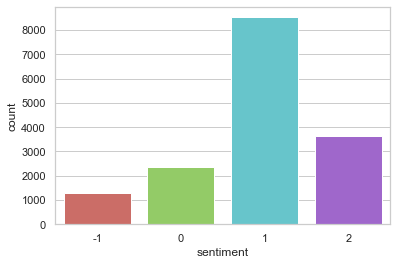

In [10]:
sns.countplot(x='sentiment', data=train, palette='hls')
plt.show()

In [11]:
#check for stopwords
train['stopword_count'] = train['message'].apply(lambda tweet: len([word for word in tweet.split() if word in STOP_WORDS]))
train.head()

,sentiment,message,tweetid,stopword_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,3
1,1,It's not like we lack evidence of anthropogeni...,126103,3
2,2,RT @RawStory: Researchers say we have three ye...,698562,8
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,5


In [12]:
#remove stopwords
train['message'] = train['message'].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in STOP_WORDS]))
test['message'] = test['message'].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in STOP_WORDS]))
train.head()

,sentiment,message,tweetid,stopword_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,3
1,1,It's like lack evidence anthropogenic global w...,126103,3
2,2,RT @RawStory: Researchers years act climate ch...,698562,8
3,1,#TodayinMaker# WIRED : 2016 pivotal year war c...,573736,5
4,1,"RT @SoyNovioDeTodas: It's 2016, racist, sexist...",466954,5


In [13]:
#convert all to lower case
train['message'] = train['message'].apply(lambda tweet: tweet.lower())
test['message'] = test['message'].apply(lambda tweet: tweet.lower())
train.head()

,sentiment,message,tweetid,stopword_count
0,1,polyscimajor epa chief doesn't think carbon di...,625221,3
1,1,it's like lack evidence anthropogenic global w...,126103,3
2,2,rt @rawstory: researchers years act climate ch...,698562,8
3,1,#todayinmaker# wired : 2016 pivotal year war c...,573736,5
4,1,"rt @soynoviodetodas: it's 2016, racist, sexist...",466954,5


In [14]:
#check for # and @
train['message'] = train['message'].apply(lambda tweet: re.sub('rt', '', tweet))
test['message'] = test['message'].apply(lambda tweet: re.sub('rt', '', tweet))
train.head()

,sentiment,message,tweetid,stopword_count
0,1,polyscimajor epa chief doesn't think carbon di...,625221,3
1,1,it's like lack evidence anthropogenic global w...,126103,3
2,2,@rawstory: researchers years act climate chan...,698562,8
3,1,#todayinmaker# wired : 2016 pivotal year war c...,573736,5
4,1,"@soynoviodetodas: it's 2016, racist, sexist, ...",466954,5


In [20]:
# labels
y = train['sentiment']

# features
X = train.drop('sentiment', axis=1)

In [21]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(train.drop((['sentiment', 'message']),axis=1), 
                                                    #train['sentiment'], test_size=0.30,
                                                    #random_state=15)

In [25]:
X_transformed = pd.get_dummies(X, drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=50)

In [16]:
#modelLR = LogisticRegression()
#modelLR.fit(X_train, y_train)
#predictions = modelLR.fit(X_test, y_test)

C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred_lr = model.predict(X_test)

### Evaluation

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, pred_lr)

array([[   0,    0,  317,    0],
       [   0,    0,  569,    0],
       [   0,    0, 2172,    0],
       [   0,    0,  897,    0]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       317
           0       0.00      0.00      0.00       569
           1       0.55      1.00      0.71      2172
           2       0.00      0.00      0.00       897

    accuracy                           0.55      3955
   macro avg       0.14      0.25      0.18      3955
weighted avg       0.30      0.55      0.39      3955



C:\Users\lady kemetGodess\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
